### 線形回帰モデル

- 回帰問題　\
機械学習の問題としては大きく「回帰」「分類」に分けられる。\
回帰問題は入力値（離散or連続値）から連続値を出力として予測する問題のこと。\
例）給料や家賃の予測など

- 入力 \
入力は$m$次元のベクトルで表され、説明変数や特徴量と呼ばれる。\
例)家賃の予測の場合、部屋の広さや立地などそれぞれが特徴量となる。

- 出力 \
予測する値、目的変数と呼ばれる。回帰モデルの場合スカラーとなる。

$$
 \boldsymbol{x} = (x_1, x_2, \dots, x_m)^T \in \mathbb{R}^m \\
 y \in \mathbb{R}^1
$$

線形回帰モデルは、機械学習モデルの一つで教師あり学習に分類される。
入力となる特徴量と重み（パラメータ）の線形結合を出力することで予測を行う。

パラメータは
$$
 \boldsymbol{w} = (w_1, w_2, \dots, w_m)^T \in \mathbb{R}^m
$$
であり、それぞれ成分が入力の成分の重みとなる。それらの線形結合は

$$
 \hat{y} = \sum_{j=1}^{m} w_jx_j + w_0 = \boldsymbol{w}^T \boldsymbol{x} + w_0
$$

と書ける。この線形結合が予測値となり$\hat{y}$で表す。正解データと区別して表記する。\
線形回帰問題ではこのパラメータ$\boldsymbol{w}$を教師データより求めるのが問題となる。このときの$w_0$をバイアス項と呼ぶ。

入力に$x_0=1$を加えることで、$w_0$もベクトル表記に加えて

$$
 \hat{y} = \boldsymbol{w}^T \boldsymbol{x}
$$

と書ける。

#### 【モデルの表現】


- 単回帰モデルの場合 \
説明変数が一つの線形回帰モデルを単回帰モデルと呼ぶ。
この場合、特徴量は一つとなる。

モデルの式は

$$
 y = w_0 + w_1x_1 + \epsilon
$$

となる。$w_0$はいわゆる切片、$w_1$は傾きとなる。$\epsilon$は誤差。ここでの$y$は正解データ（教師データ）。教師データを使って、切片と傾きを誤差が小さくなるように決定するのが問題となる。

教師データがn組($(x_1, y_1), (x_2, y_2), \dots (x_n, y_n)$)あるとき、モデルの式よりn個の方程式が導出される。
$$
 \begin{eqnarray*}
 y_1 &= w_0 + w_1 x_1 \\ 
 y_2 &= w_0 + w_1 x_2 \\ 
 \vdots \\
 y_n &= w_0 + w_1 x_n
 \end{eqnarray*}
$$

これを行列で表記すると、
$$
 \left(
 \begin{array}{c}
  y_1 \\
  y_2 \\
  \vdots \\
  y_n
 \end{array}
 \right)
 =
   \left(
 \begin{array}{cc}
  1 & x_1 \\
  1 & x_2 \\
  \vdots & \\
  1 & x_n
 \end{array}
 \right)
  \left(
 \begin{array}{c}
 w_0 \\
 w_1
 \end{array}
 \right)
 +
 \left(
 \begin{array}{c}
 \epsilon_1 \\
 \epsilon_2 \\
 \vdots \\
 \epsilon_n
 \end{array}
 \right)
$$

$$
\boldsymbol{y} = \boldsymbol{X}\boldsymbol{w} + \boldsymbol{\epsilon}
$$
と行列であらわすことができる。

- 重回帰モデルの場合 \
　説明変数が複数のモデル。単回帰は直線で予測するが、重回帰は曲面（超平面）となる

単回帰分析との違いは特徴量の数とそれに対応するパラメータの数だけで、単回帰分析の場合と同じように行列表現が可能。

$$
 \begin{eqnarray*}
 y_1 &= w_0 + w_1 x_{11} + w_2x_{12} + \dots + w_n x_{1n} + \epsilon_1 \\  
 y_2 &= w_0 + w_1 x_{21} + w_2x_{22} + \dots + w_n x_{2n} + \epsilon_2 \\  
 \vdots \\
 y_n &= w_0 + w_1 x_{n1} + w_2x_{n2} + \dots + w_n x_{nn} + \epsilon_n \\  
 \end{eqnarray*}
$$

$$
 \left(
 \begin{array}{c}
  y_1 \\
  y_2 \\
  \vdots \\
  y_n
 \end{array}
 \right)
 =
   \left(
 \begin{array}{cccc}
  1 & x_{11} & x_{12} & \dots & x_{1n} \\
  1 & x_{21} & x_{22} & \dots & x_{2n} \\
  & & \vdots & \\
  1 & x_{n1} & x_{n2} & \dots & x_{nn}
 \end{array}
 \right)
  \left(
 \begin{array}{c}
 w_0 \\
 w_1 \\
 \vdots \\
 w_n
 \end{array}
 \right)
 +
 \left(
 \begin{array}{c}
 \epsilon_1 \\
 \epsilon_2 \\
 \vdots \\
 \epsilon_n
 \end{array}
 \right)
$$

$$
\boldsymbol{y} = \boldsymbol{X}\boldsymbol{w} + \boldsymbol{\epsilon}
$$
と行列であらわすことができる。

#### 【パラメータの推定方法】

- 最小二乗法 \
 学習データの平均二乗誤差(MSE)を最小にするようなパラメータを求める。

$$
 MSE = \frac{1}{N}\sum_{j=1}^N (\hat{y}_j - y_j)^2
$$

$N$はトレーニングデータのデータ数。$\hat{y}_j$は$j$番目の予測値、$y_j$は$j$番目の正解データ。

最小二乗法ではこのMSEが最小となるようなパラメータ$w$を探す。($\hat{y}$は$w$の関数）
MSEを$w$の関数としてみたとき、$w$についての勾配が$0$になるような点を求めることで、MSEが最小となる$w$を求めることができる。

MSEを最小にする$w$、つまりMSEの勾配を$0$にする$w$を$\hat{w}$とすると

$$
\hat{w} = {arg}\min_{w \in \mathbb{R}^{m+1} }MSE
$$

勾配を$0$にする$w$を求める。
$$
 \frac{\partial}{\partial w} {MSE} = 0
$$
を満たす$w$を求める。

$$
\frac{\partial}{\partial w}
\left\{
\frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2
\right\}
= 0
$$

⇒
$$
 \frac{1}{N} \frac{\partial}{\partial w}\left\{(X\boldsymbol{w} - \boldsymbol{y})^T(X\boldsymbol{w}-\boldsymbol{y})  \right\}= 0
$$

$$
 \frac{1}{N} \frac{\partial}{\partial w}\left\{(\boldsymbol{w}^TX^T X \boldsymbol{w} - y^T X \boldsymbol{w}
 -\boldsymbol{w}^TX^Ty + y^Ty)  \right\}= 0
$$

$X\boldsymbol{w}$は行列×ベクトルでベクトルとなるので、$y^TX\boldsymbol{w}$は内積となる。
また、$\boldsymbol{w}^T \boldsymbol{X}^T y = (X \boldsymbol{w})^T y $もベクトル（$X\boldsymbol{w}$）と$\boldsymbol{y}$の内積なので、両者は等しい。

$$
\frac{1}{N} \frac{\partial}{\partial w}\left\{(\boldsymbol{w}^TX^T X \boldsymbol{w} -2\boldsymbol{w}^TX^Ty + y^Ty)  \right\}= 0
$$

$$
 2X^TX \boldsymbol{w} - 2X^T \boldsymbol{y} =0
$$

$$
 \boldsymbol{w} = (X^T X)^{-1} X^T\boldsymbol{y}
$$

この$w$を使うと予測値は
$$
 \hat{y} = X(X^T X)^{-1} X^T\boldsymbol{y} 
$$

### ハンズオン（線形回帰）

- データセット \
ボストンの住宅データセット

In [5]:
#必要モジュールのインポート
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
#dataのロード
boston = load_boston()

In [11]:
#各特徴量の名称
print(boston.feature_names)
#各特徴量のデータ
print(boston.data)
#各データの家賃（目的変数）
print(boston.target)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22

In [13]:
#dataをデータフレームにする
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [14]:
#dfに家賃の列も追加する
df["PRICE"] = np.array(boston.target)

In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


データを確認するときは、各特徴量の値の分布を確認しておくほうがいい。
例えば、CHASは先頭5行は0しかない。次のグラフとそれぞれの値をカウントすると0と1しかとらないことがわかる。
もしこのデータが0しかとらないなら、特徴量として使用しなくてよくなる

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CBFA33F588>]],
      dtype=object)

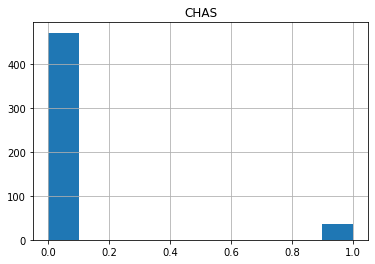

In [24]:
#"CHAS"のヒスト
df.hist(column="CHAS")

In [28]:
#["CHAS"]の値
df["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

データセットを確認すると下記のように書かれている。
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise）
チャールズリバーに道路が接している場合は１、そうでない場合は0が格納されている。\
データを確認するときは各特徴量の相関などを確認することも必要

### 単回帰分析

In [63]:
#単回帰分析の一つの説明変数としてRMを使用する（1住戸あたりの平均部屋数）
print(df["RM"].values.shape, df[["RM"]].values.shape)

(506,) (506, 1)


後々scikit-learnのfitメソッドにデータを入れるが、fitは2次元配列を想定している。
そのため、上の前者の方法でデータをとると1次元のデータになるため、エラーとなる。
一つの特徴量でも配列でColumnを指定する必要がある。

In [74]:
data = df[["RM"]]
print(data.shape)

(506, 1)


In [88]:
target = df.loc[:, ["PRICE"]].values

In [89]:
target.shape

(506, 1)

targetは1次元を想定しているのでこれでOK。
df.loc[:, ["PRICE"]].valuesとしてもfitのエラーは出ない。

In [90]:
#scikit-learnの線形回帰モデルをインポート
from sklearn.linear_model import LinearRegression

In [91]:
model = LinearRegression()
model.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

これでデータを基にした予測モデルができた。部屋数が１のときの予測をしてみる。

In [92]:
model.predict([[1]])

array([[-25.5685118]])

結果は-25000$となる。マイナスの値であり、家賃の予測としては不適当。"RM"のデータを確認してみる

3.561


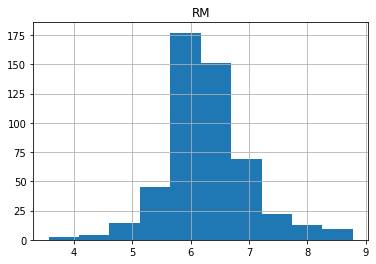

In [86]:
df.hist(column="RM")
print(df["RM"].min())

最低値が3.561であることから、もともとのデータセットに1部屋のデータなかったことで、予測が外挿となっていることがわかる。1部屋のデータも予測したい場合はモデル作成用のデータにそれらのデータも入れる必要がある。

### 重回帰分析

特徴量として"CRIM", "RM"の二つを使用する。

In [93]:
data2 = df[["CRIM", "RM"]].values

In [95]:
data2.shape

(506, 2)

In [97]:
target2 = df[["PRICE"]].values

In [102]:
#modelの作成
model2 = model.fit(data2, target2)

In [107]:
model2.predict([[20.0, 7]])

array([[24.19449326]])

モデルの予測値が妥当かどうか具体的な値を入れて確認する必要がある。
例えば"CRIM"は大きくなると家賃は安くなるだろうし、"RM"も少なくなれば家賃は安くなるだろうなど。
具体的な値で確認することも大事

【課題】
部屋数が4で犯罪率が0.3の物件を予測すると

In [109]:
model2.predict([[0.3,4]])

array([[4.24007956]])

家賃は$4,240となる

### 回帰分析のモデル検証

#### 決定係数
$R^2$値:
モデルの当てはまりの良さを示す指標

$$
 R^2(y, \hat{y}) = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}
$$

当てはまりが最もいい⇒予測値が正解データに完全に一致するとき、$R^2$は1となる。 \
scikit-learnでの実装

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(data2, target2, test_size=0.2, random_state=1)
#分割したデータで学習
model3 = model.fit(X_train, y_train)
#テストデータの予測
y_pred = model3.predict(X_test)
#予測データと正解データを用いてR2値を計算
r2_score(y_test, y_pred)

0.6213771216196422

MSE(平均二乗誤差）の計算

回帰分析では(平均)二乗誤差を小さくすることで、パラメータを決定している。
パラメータやテストサイズを変えてモデルの性能を確認していくうえで平均二乗誤差をプロットしていくと便利な場合もある。

In [120]:
#scikit-learnでのMSE計算
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

37.4183106622784

トレーニングデータとテストデータの予測値の残渣プロット
実際の予測データと実データを比較することもあるので、プロットの仕方は要確認

(404, 1)


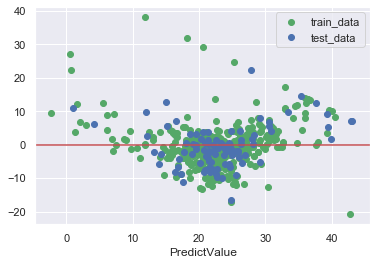

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

train_pred = model3.predict(X_train)
test_pred = model3.predict(X_test)
print(train_pred.shape)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(train_pred, y_train-train_pred, marker="o", c="g", label="train_data")
ax.scatter(test_pred, y_test-test_pred, marker="o", c="b", label="test_data")
ax.axhline(y=0, c="r")
ax.set_xlabel("PredictValue")
ax.legend()
plt.show()